<font size=20></font>
# Introduction
The sinking Of Titanic is one of the most notorious shipwrdeks in the history .<br> In 1912, during her voyage, the Titanic sank after colliding with an icebergkilling 1502 out of 2224 passenger and crew

<font color ='red'>
Content:
</font>

[1. Load and Check Data](#1)<br>
[2. Variable Description](#2)<br>
[3. Univariate Variable Analysis](#3)<br>
&emsp;[3.1. Categorical Variable Analysis](#4)<br>
&emsp;[3.2 Univariate Variable Analysis](#5)<br>
[4. Basic Data Analysis](#6)<br>
[5. Outlier Detecttion](#7)<br>
[6. Missing Value](#8)<br>
&emsp;[6.1. Find Missing Value](#9)<br>
&emsp;[6.2 Fill Missing Value](#10)<br>
[7. Visualization ](#11)<br>



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id='1'></a><br>
#  1. Load and Check Data


In [2]:
#plt.style.available

In [3]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_PasssengerId=test_df["PassengerId"]

In [4]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='2'></a><br>
# 2. Variable Description

1 PassengerId uqnique id number to each passenger<br>
2 Survived live(1) died(0)<br>
3 Pclass passenger class<br>
4 Name <br>
5 Sex <br>
6 Age <br>
7 SibSpb number od siblings/spouse <br>
8 Parch number of parents/children<br>
9 Ticket ticket number<br>
10 Fare amount of money spent on ticket<br>
11 Cabin <br>
12 Embarked <br>

------------------------
 |#| Column        Dtype<br>    
 0   PassengerId      int64 <br>
 1   Survived         int64 <br> 
 2   Pclass           int64  <br>
 3   Name             object <br>
 4   Sex              object <br>
 5   Age              float64<br>
 6   SibSp            int64  <br>
 7   Parch            int64  <br>
 8   Ticket           object <br>
 9   Fare             float64<br>
 10  Cabin            object <br>
 11  Embarked         object <br>
dtypes: float64(2), int64(5), object(5)

In [7]:
#train_df.info()
# liste=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
# for index,i in enumerate(liste):
#     print (index+1,i,"<br>")

<a id='3'></a><br>
# 3. Univariate Variable Analysis<br>
* Categorical Variable : Survived,Sex,Pclass,Embark,Cabin,Name,Sibsp ,Parch
* Numerical Variable: Age,PassengerId, Fare

<a id='4'></a><br>
> # 3.1. Categorical Variable Analysis<br>


In [70]:
import plotly_express as px
def barplots(variable):
    fig = px.histogram(train_df,
                       x=variable,
                       marginal='box',
                       title=variable,
                       width=600,
                       height=300,
                       color_discrete_sequence=['indianred']
                       )
    fig.update_layout(bargap=0.1)
    fig.show()

In [71]:
category1=[ 'Survived', 'Pclass','Sex', 'SibSp',
       'Parch', 'Embarked', 'PassengerId','Age' ,'Fare','Name', 'Ticket', 'Cabin' ]
for i in category1:
    barplots(i)

In [8]:
def bar_plot(variable):
    """
    input : variable ex :"sex"
    output : bar plot  value count
    """
    #get feature
    var =train_df[variable]
    #count number of categorical variable
    varValue=var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequence")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))

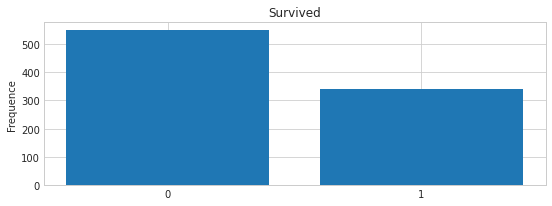

Survived:
 0    549
1    342
Name: Survived, dtype: int64


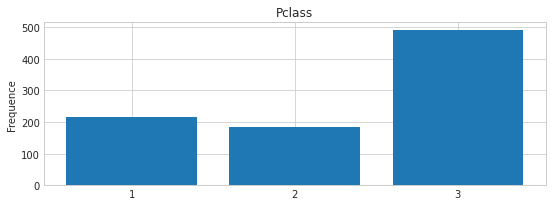

Pclass:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


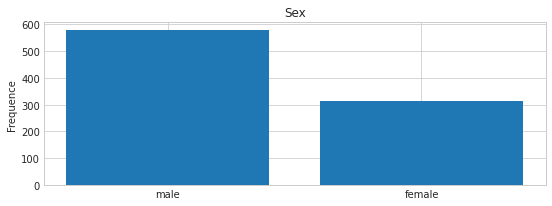

Sex:
 male      577
female    314
Name: Sex, dtype: int64


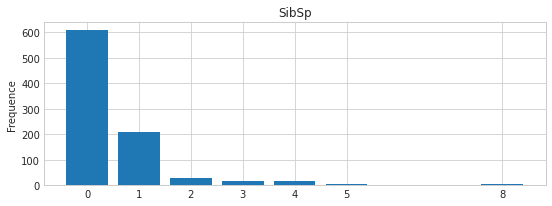

SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


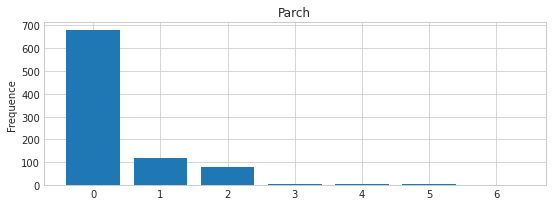

Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


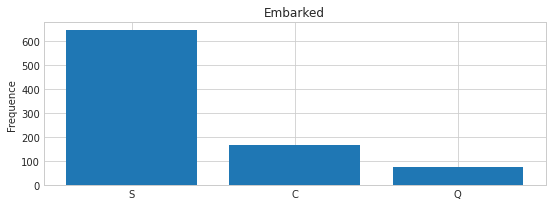

Embarked:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [9]:

category1=[ 'Survived', 'Pclass','Sex', 'SibSp',
       'Parch', 'Embarked']
for variable in category1:
    bar_plot(variable)
    

In [10]:
category2=['Name', 'Ticket', 'Cabin' ]
for i in category2:
    print("----{}----\n{} \n".format(i,train_df[i].value_counts()))

----Name----
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

----Ticket----
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 

----Cabin----
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dty

#### When variables with multiple categories are plotted, we do not see much meaningful data.
Name ,Ticket,Cabin

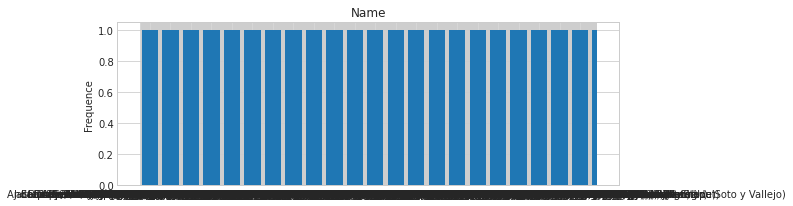

Name:
 Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


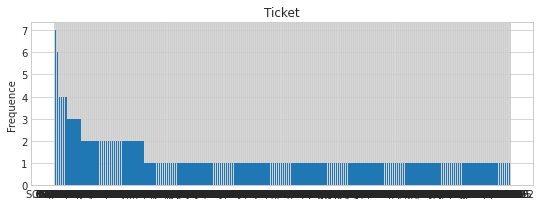

Ticket:
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


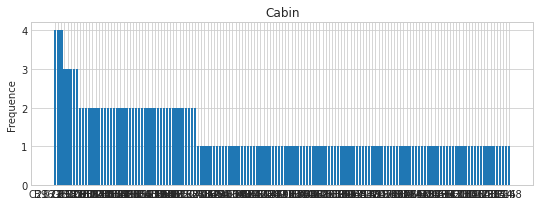

Cabin:
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


In [11]:
category2=['Name', 'Ticket', 'Cabin' ]
for variable in category2:
    bar_plot(variable)

<a id='5'></a><br>
> # 3.2 Numerical Variable Analysis<br>
r>

In [12]:
def plot_hist(variable):
    """
    input : variable ex :PassengerId"
    output : bar plot  value count
    """
    #get feature
    var=train_df[variable]
    #count number of categorical variable
    varValue=var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequence")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))



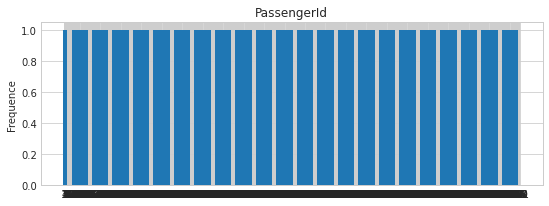

PassengerId:
 1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


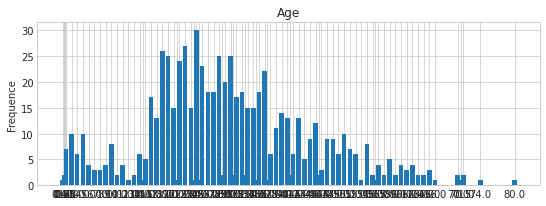

Age:
 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


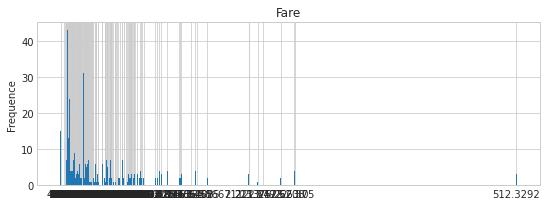

Fare:
 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


In [13]:
numerical=['PassengerId','Age' ,'Fare']
for variable in numerical:
    plot_hist(variable)

In [14]:
def plot_hisst1(variable):
    plt.figure(figsize=(25,10))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequence")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [15]:
# train_df.Fare.plot(kind = 'hist',figsize = (12,12),bins=50)
# plt.xlabel('assengerId')           
# plt.ylabel('frequance')
# plt.title('PassengerId histogram') 


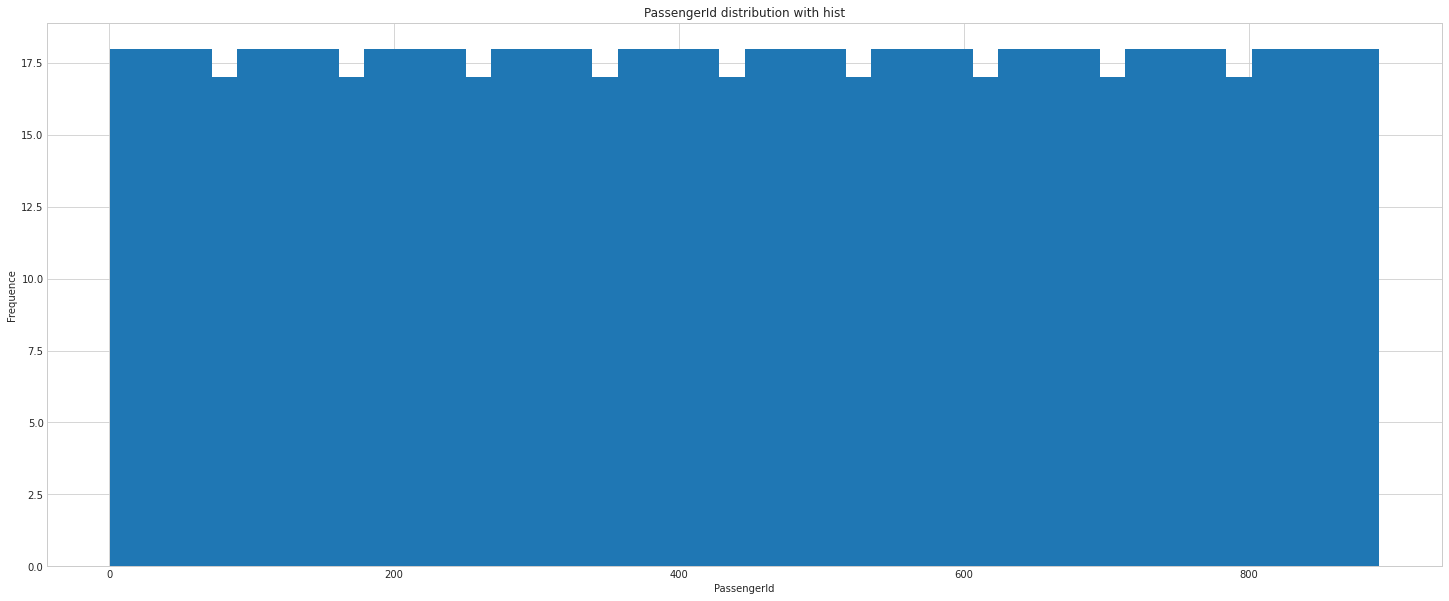

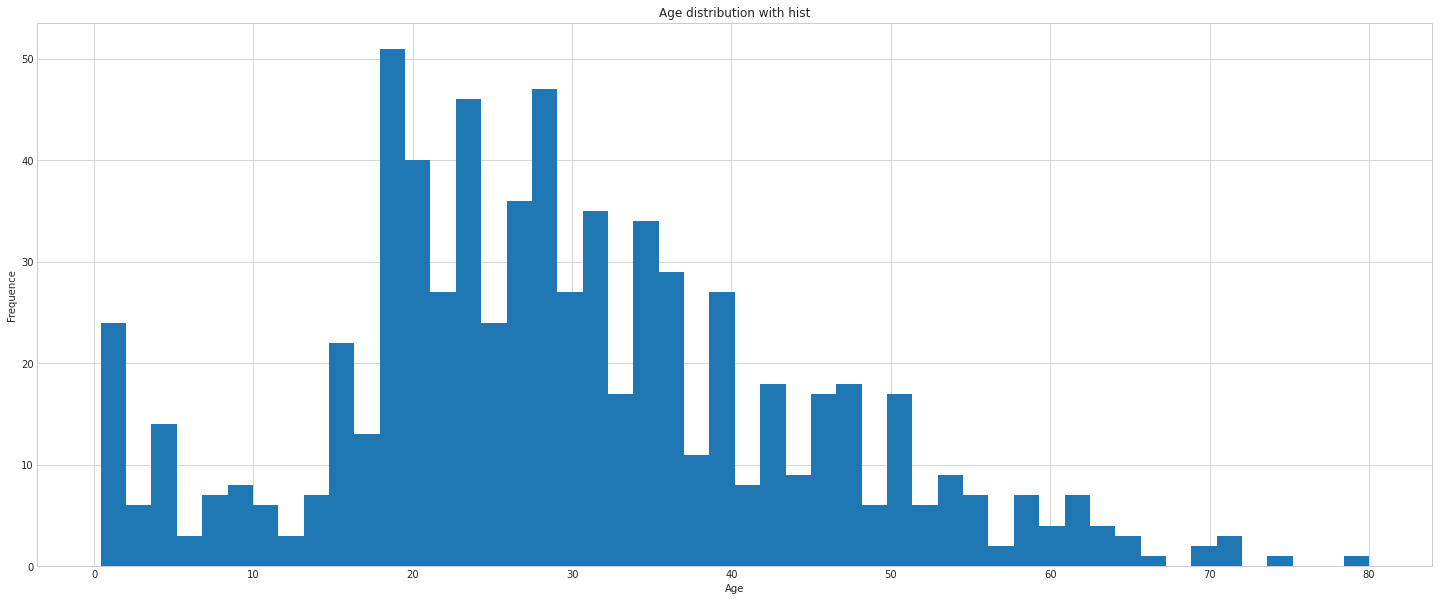

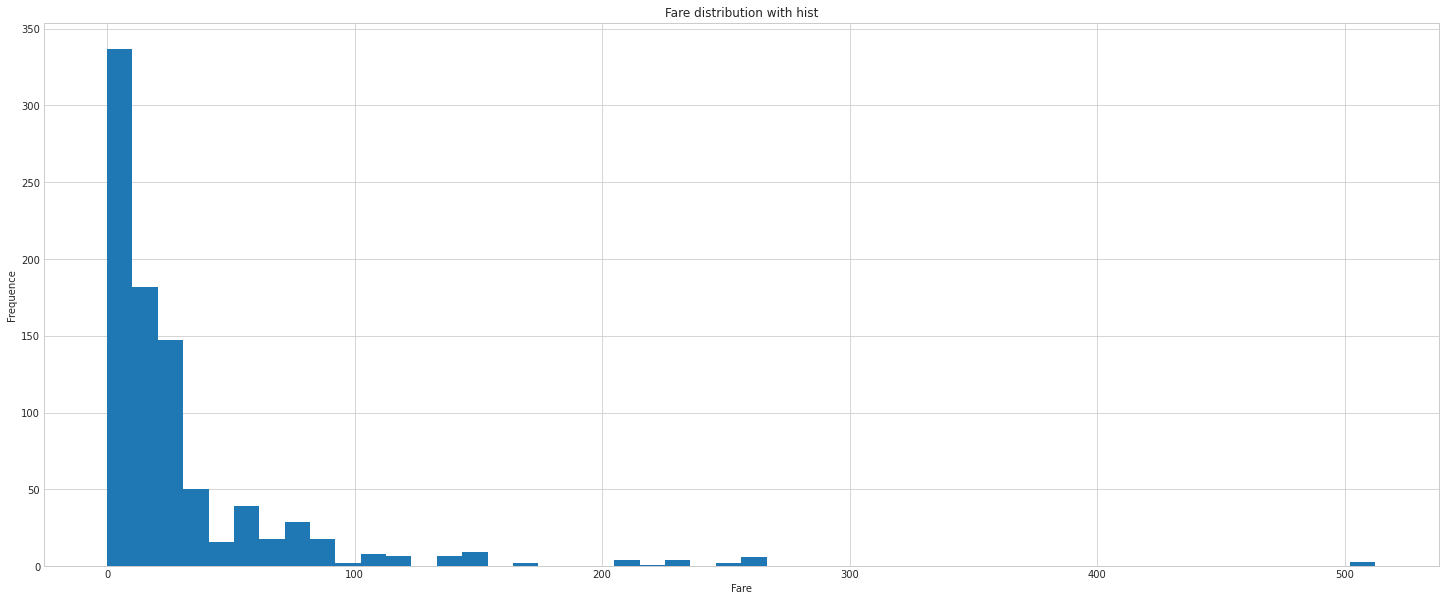

In [16]:
numerical=['PassengerId','Age' ,'Fare']
for variable in numerical:
    plot_hisst1(variable)

In [17]:
# train_df["Age"].plot(kind = 'hist',grid=True,alpha=0.9,subplots=True,figsize=(25,10),bins=50)


<a id='6'></a><br>
# 4. Basic Data Analysis<br>
* Pclass-Survived
* sex-Survived
* SibSp-Survived
* Parch-Survived


In [18]:
#Pclass-Survived
train_df[["Pclass","Survived","Sex"]].groupby(["Pclass","Sex"],as_index=False).mean().sort_values(by="Survived",ascending=True)

,Pclass,Sex,Survived
5,3,male,0.135447
3,2,male,0.157407
1,1,male,0.368852
4,3,female,0.500000
2,2,female,0.921053
0,1,female,0.968085


In [144]:
pcS=train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).count().sort_values(by="Survived",ascending=False)
fig=px.bar(pcS,
                x='Pclass',
                y='Survived',
                color='Survived',
                text='Pclass',
                title='Pclass-Survived relationship',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(pcS)

   Pclass  Survived
2       3       484
0       1       213
1       2       184


In [140]:
pcSm=train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(pcSm,
                x='Pclass',
                y='Survived',
                base='Pclass',
                color='Survived',
                title='Pclass Survived mean relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(pcSm)


   Pclass  Survived
0       1  0.629108
1       2  0.472826
2       3  0.245868


In [122]:
#"Sex","Survived"
ssm=train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(ssm,
                x='Sex',
                y='Survived',
                title='Sex Survived mean relationship ',
                color='Survived',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(ssm)


      Sex  Survived
0  female  0.747573
1    male  0.190559


In [123]:
#"Sex","Survived"
ss=train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).count().sort_values(by="Survived",ascending=False)
fig=px.bar(ss,
                x='Sex',
                y='Survived',
                color='Survived',
                title='Sex Survived relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(ss)

      Sex  Survived
1    male       572
0  female       309


In [143]:
sibSm=train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(sibSm,
                x='SibSp',
                y='Survived',
                color='Survived',
                title='SibSp Survived mean relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(sibSm)

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
4      4  0.166667
3      3  0.153846
5      5  0.000000
6      8       NaN


In [125]:
sibS=train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).count().sort_values(by="Survived",ascending=False)
fig=px.bar(sibS,
                x='SibSp',
                y='Survived',
                color='Survived',
                title='SibSp Survived  relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(sibS)

   SibSp  Survived
0      0       608
1      1       209
2      2        28
4      4        18
3      3        13
5      5         5
6      8         0


In [127]:
parchSm=train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(parchSm,
                x='Parch',
                y='Survived',
                color='Survived',
                title='Parch Survived mean  relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(parchSm)

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.542857
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
7      9       NaN


In [128]:
parchS=train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).count().sort_values(by="Survived",ascending=True)
fig=px.bar(parchS,
                x='Parch',
                y='Survived',
                color='Survived',
                title='Parch Survived relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(parchS)

   Parch  Survived
7      9         0
6      6         1
4      4         4
3      3         5
5      5         5
2      2        70
1      1       118
0      0       678


<a id='7'></a><br>
> # 5. Outlier Detecttion<br>
featuresthat corrupt our data


In [26]:
def detect_qoutliers(df,features):
    outlier_indices=[]
    
    for c in features:
        #1quartile
        Q1=np.percentile(df[c],25)
        #3quartile
        Q3=np.percentile(df[c],75)
        #IQR 
        IQR=Q3-Q1
        
        #Outlier step
        outlier_step=IQR*1.5
        
        #detect outlier and their indices
        outlier_list_col=df[(df[c]<Q1-outlier_step)|(df[c]>Q3+outlier_step)].index
        
        #store indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)   
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>2)
    return multiple_outliers

In [151]:
train_df.loc[detect_qoutliers(train_df,['SibSp','Parch','Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [152]:
train_df=train_df.drop(detect_qoutliers(train_df,['SibSp','Parch','Fare']),axis=0).reset_index(drop=True)

In [153]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1292,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1293,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1294,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<a id='8'></a><br>
> # 6. Missing Value<br>




In [29]:
train_df_len=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [155]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1292,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1293,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1294,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [154]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<a id='9'></a><br>
> # 6.1 Find Missing Value<br>



In [150]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Cabin'], dtype='object')

In [149]:
train_df.isnull().sum()

PassengerId       0
Survived        415
Pclass            0
Name              0
Sex               0
Age             255
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1005
Embarked          0
dtype: int64

<a id='10'></a><br>
> # 6.2 Fill Missing Value<br>

* Embarked has 2 missing value
* Fare has only 1


In [156]:
train_df["Embarked"].isnull()
pd.isnull(train_df["Embarked"])

0       False
1       False
2       False
3       False
4       False
        ...  
1291    False
1292    False
1293    False
1294    False
1295    False
Name: Embarked, Length: 1296, dtype: bool

In [157]:
#train_df[train_df["Embarked"].isnull()]
train_df[pd.isnull(train_df["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<AxesSubplot:title={'center':'Fare'}, xlabel='Embarked'>

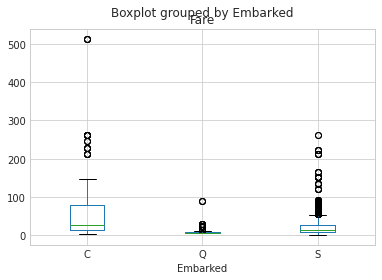

In [158]:
train_df.boxplot(column="Fare",by="Embarked")
#Buradaki boş değere sahip yolcualrın ödedikleri bilet parasına bakılırsa c limanından binmiş olma ihtimalleri çok yüksek
## Considering the ticket money paid by the passengers with empty values here, it is very likely that they got on from port c.

In [36]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[pd.isnull(train_df["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [159]:
train_df[pd.isnull(train_df["Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [38]:
mean_fare=np.mean(train_df[train_df["Pclass"]==3]["Fare"])

In [39]:
train_df["Fare"]=train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))

In [40]:
train_df[train_df["PassengerId"]==1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.74122,NaN,S


<a id='11'></a><br>
# 7. Visualization 
